In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import datetime
import numpy as np

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score

import os
import pickle

In [2]:
data = pd.read_csv("TrainingData_v2.csv")
data.describe()

c:\users\swlee\anaconda3\envs\cmpe255\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (11,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Accident,Cluster,Cluster_Lat,Cluster_Lng,Day,Day_of_Year,Hour,Humidity(%),Month,Start_Lat,Start_Lng,Temperature(F),Visibility(mi),Weekday,Wind_Speed(mph),Year,Zipcode
count,45544.000000,45544.000000,45544.000000,45544.000000,45544.000000,45544.000000,45544.000000,45544.000000,45544.000000,11455.000000,11455.000000,45544.000000,45544.000000,11455.000000,45544.000000,45544.000000,11455.000000
mean,0.251515,50.569867,37.330492,-121.895029,15.800325,173.306780,11.672954,64.052304,6.194779,37.330474,-121.894978,60.204015,9.520382,2.482584,4.340732,2017.295780,95121.411611
std,0.433889,37.025340,0.040108,0.046964,8.812811,107.614003,6.664430,18.271686,3.520484,0.040161,0.046998,11.149256,1.310854,1.752453,3.809122,1.033957,7.979458
min,0.000000,0.000000,37.209597,-122.032101,1.000000,1.000000,0.000000,9.000000,1.000000,37.208383,-122.032402,30.200000,0.100000,0.000000,0.060000,2016.000000,95110.000000
25%,0.000000,20.000000,37.316460,-121.930717,8.000000,76.000000,6.000000,51.000000,3.000000,37.316490,-121.930800,52.850000,9.958000,1.000000,1.260000,2016.000000,95112.000000
50%,0.000000,42.000000,37.327972,-121.899759,16.000000,169.000000,12.000000,67.000000,6.000000,37.327797,-121.899760,58.990000,9.997000,2.000000,3.500000,2017.000000,95122.000000
75%,1.000000,81.000000,37.361405,-121.861402,23.000000,268.000000,17.000000,79.000000,9.000000,37.360908,-121.861732,66.530000,10.000000,4.000000,5.980000,2018.000000,95128.000000
max,1.000000,137.000000,37.422304,-121.722701,31.000000,366.000000,23.000000,100.000000,12.000000,37.422570,-121.721098,108.510000,12.000000,6.000000,125.400000,2019.000000,95138.000000


In [3]:
data['Weekday'] = data.apply(lambda row: datetime.date(row.Year, row.Month, row.Day).weekday(), axis = 1)
data

,Accident,Cluster,Cluster_Lat,Cluster_Lng,Day,Day_of_Year,Hour,Humidity(%),Month,Start_Lat,Start_Lng,Start_Time,Temperature(F),Visibility(mi),Weather_Condition,Weekday,Wind_Speed(mph),Year,Zipcode
0,1.0,0,37.250607,-121.911475,21,173,10,41.0,6,37.250729,-121.910713,2016-06-21 10:16:26,75.20,10.000,Clear,1,5.80,2016,95118.0
1,1.0,1,37.328977,-121.870144,21,173,10,53.0,6,37.328312,-121.871811,2016-06-21 10:17:17,73.00,10.000,Partly Cloudy,1,4.60,2016,95112.0
2,1.0,2,37.382332,-121.904376,21,173,11,27.0,6,37.382370,-121.904358,2016-06-21 11:30:58,84.00,10.000,Partly Cloudy,1,8.10,2016,95131.0
3,1.0,3,37.401425,-121.908851,21,173,12,24.0,6,37.401531,-121.908859,2016-06-21 12:53:58,87.10,10.000,Partly Cloudy,1,9.20,2016,95131.0
4,1.0,4,37.339455,-121.852372,21,173,14,16.0,6,37.339455,-121.852043,2016-06-21 14:34:20,93.20,10.000,Clear,1,15.00,2016,95122.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45539,0.0,137,37.327972,-121.875633,5,64,22,64.0,3,NaN,NaN,NaN,47.91,9.997,NaN,0,0.76,2018,NaN
45540,0.0,137,37.327972,-121.875633,17,107,4,83.0,4,NaN,NaN,NaN,42.82,9.997,NaN,1,0.38,2018,NaN
45541,0.0,137,37.327972,-121.875633,10,161,17,45.0,6,NaN,NaN,NaN,69.00,9.997,NaN,5,5.96,2017,NaN
45542,0.0,137,37.327972,-121.875633,23,174,19,56.0,6,NaN,NaN,NaN,76.42,9.997,NaN,4,2.90,2017,NaN


In [4]:
data['Weekday'].isna().sum()

0

In [5]:
data['Start_Lat'] = data.apply(lambda row: row.Cluster_Lat \
                               if np.isnan(row.Start_Lat) \
                               else row.Start_Lat, axis=1)

data['Start_Lng'] = data.apply(lambda row: row.Cluster_Lng \
                               if np.isnan(row.Start_Lng) \
                               else row.Start_Lng, axis=1)

data

,Accident,Cluster,Cluster_Lat,Cluster_Lng,Day,Day_of_Year,Hour,Humidity(%),Month,Start_Lat,Start_Lng,Start_Time,Temperature(F),Visibility(mi),Weather_Condition,Weekday,Wind_Speed(mph),Year,Zipcode
0,1.0,0,37.250607,-121.911475,21,173,10,41.0,6,37.250729,-121.910713,2016-06-21 10:16:26,75.20,10.000,Clear,1,5.80,2016,95118.0
1,1.0,1,37.328977,-121.870144,21,173,10,53.0,6,37.328312,-121.871811,2016-06-21 10:17:17,73.00,10.000,Partly Cloudy,1,4.60,2016,95112.0
2,1.0,2,37.382332,-121.904376,21,173,11,27.0,6,37.382370,-121.904358,2016-06-21 11:30:58,84.00,10.000,Partly Cloudy,1,8.10,2016,95131.0
3,1.0,3,37.401425,-121.908851,21,173,12,24.0,6,37.401531,-121.908859,2016-06-21 12:53:58,87.10,10.000,Partly Cloudy,1,9.20,2016,95131.0
4,1.0,4,37.339455,-121.852372,21,173,14,16.0,6,37.339455,-121.852043,2016-06-21 14:34:20,93.20,10.000,Clear,1,15.00,2016,95122.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45539,0.0,137,37.327972,-121.875633,5,64,22,64.0,3,37.327972,-121.875633,NaN,47.91,9.997,NaN,0,0.76,2018,NaN
45540,0.0,137,37.327972,-121.875633,17,107,4,83.0,4,37.327972,-121.875633,NaN,42.82,9.997,NaN,1,0.38,2018,NaN
45541,0.0,137,37.327972,-121.875633,10,161,17,45.0,6,37.327972,-121.875633,NaN,69.00,9.997,NaN,5,5.96,2017,NaN
45542,0.0,137,37.327972,-121.875633,23,174,19,56.0,6,37.327972,-121.875633,NaN,76.42,9.997,NaN,4,2.90,2017,NaN


In [10]:
# Import train_test_split function

features = ['Month', 'Day', 'Day_of_Year', 'Weekday', 'Hour']

# features = ['Month', 'Day', 'Day_of_Year', 'Weekday', 'Hour',\
#             'Humidity(%)', 'Temperature(F)', 'Visibility(mi)', 'Wind_Speed(mph)']

X=data[features]  # Features
#y=data.Cluster.astype('category')  # Labels
y=data.Accident

In [11]:
# Split dataset into training set and test set
#scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Random Forest

In [12]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100, n_jobs=6)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
y_list = [clf]

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("ROC score",roc_auc_score(y_test, y_pred))
print("F1 score",f1_score(y_test, y_pred))

Accuracy: 0.7348775935887584
ROC score 0.6238563793018161
F1 score 0.43323163576625195


No handles with labels found to put in legend.


Hour           0.393968
Day_of_Year    0.228915
Day            0.185443
Weekday        0.150524
Month          0.041150
dtype: float64


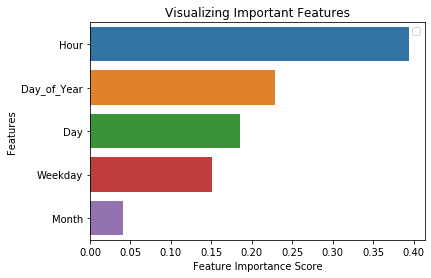

In [13]:
# Creating a bar plot
feature_imp = pd.Series(clf.feature_importances_,index=features).sort_values(ascending=False)
print(feature_imp)
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [121]:
import pickle

pickle.dump(clf, open('rf_classifier.sav', 'wb'))

# Logicstic Regression

In [95]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
#logreg = LogisticRegression(multi_class = 'multinomial', solver='newton-cg')
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("ROC score",roc_auc_score(y_test, y_pred))
print("F1 score",f1_score(y_test, y_pred))

c:\users\swlee\anaconda3\envs\cmpe255\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.899549895707542
ROC score 0.8449161165005112
F1 score 0.7879490150637312


In [96]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.247225
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               Accident   No. Observations:                36435
Model:                          Logit   Df Residuals:                    36425
Method:                           MLE   Df Model:                            9
Date:                Thu, 14 Nov 2019   Pseudo R-squ.:                  0.5610
Time:                        14:22:36   Log-Likelihood:                -9007.6
converged:                       True   LL-Null:                       -20521.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Year               -0.0045      0.000    -11.315      0.000      -0.005      -0.004
Month         

# Linear SVC

In [97]:
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("ROC score",roc_auc_score(y_test, y_pred))
print("F1 score",f1_score(y_test, y_pred))

Accuracy: 0.8755077395981996
ROC score 0.8734388129831587
F1 score 0.7803177063153816


c:\users\swlee\anaconda3\envs\cmpe255\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# Gradient Boosting

In [98]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.862
Accuracy score (validation): 0.858
Learning rate:  0.075
Accuracy score (training): 0.915
Accuracy score (validation): 0.911
Learning rate:  0.1
Accuracy score (training): 0.924
Accuracy score (validation): 0.923
Learning rate:  0.25
Accuracy score (training): 0.966
Accuracy score (validation): 0.967
Learning rate:  0.5
Accuracy score (training): 0.972
Accuracy score (validation): 0.973
Learning rate:  0.75
Accuracy score (training): 0.980
Accuracy score (validation): 0.980
Learning rate:  1
Accuracy score (training): 0.980
Accuracy score (validation): 0.982


In [99]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.75, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
y_pred = gb_clf2.predict(X_test)
print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("ROC score",roc_auc_score(y_test, y_pred))
print("F1 score",f1_score(y_test, y_pred))


print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

Accuracy score (validation): 0.982
Accuracy: 0.9803491052804918
ROC score 0.9687658384054356
F1 score 0.9607370037288879
Confusion Matrix:
[[6784    8]
 [2314    3]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.75      1.00      0.85      6792
         1.0       0.27      0.00      0.00      2317

    accuracy                           0.75      9109
   macro avg       0.51      0.50      0.43      9109
weighted avg       0.63      0.75      0.64      9109



# XGBoost

In [100]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("ROC score",roc_auc_score(y_test, y_pred))
print("F1 score",f1_score(y_test, y_pred))

Accuracy: 0.9962674278186409
ROC score 0.9959330723952067
F1 score 0.9926818768833404


# TRAINING BY CLUSTER

In [122]:
# generating samples for each cluster
clf_container = []

cluster_max = data['Cluster'].max()

for i in range(0, cluster_max+1):
    X = data[data['Cluster'] == i][features]
    y = data[data['Cluster'] == i].Accident
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    clf=RandomForestClassifier(n_estimators=100, n_jobs = 6)
    clf.fit(X_train,y_train)
    clf_container.append(clf)
    
    y_pred = clf.predict(X_test)
    
    print("Cluster = ", i)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("ROC score",roc_auc_score(y_test, y_pred))

Cluster =  0
Accuracy: 0.9821428571428571
ROC score 0.9742528735632183
Cluster =  1
Accuracy: 0.979381443298969
ROC score 0.964683745838761
Cluster =  2
Accuracy: 0.9090909090909091
ROC score 0.8666666666666667
Cluster =  3
Accuracy: 1.0
ROC score 1.0
Cluster =  4
Accuracy: 0.9962264150943396
ROC score 0.9916666666666667
Cluster =  5
Accuracy: 0.9587628865979382
ROC score 0.9280258519388954
Cluster =  6
Accuracy: 0.967391304347826
ROC score 0.9474025974025975
Cluster =  7
Accuracy: 0.9629629629629629
ROC score 0.9506172839506174
Cluster =  8
Accuracy: 0.9795918367346939
ROC score 0.9545454545454546
Cluster =  9
Accuracy: 0.9642857142857143
ROC score 0.933806146572104
Cluster =  10
Accuracy: 0.9310344827586207
ROC score 0.8888888888888888
Cluster =  11
Accuracy: 0.9391304347826087
ROC score 0.8970588235294117
Cluster =  12
Accuracy: 0.967741935483871
ROC score 0.9375
Cluster =  13
Accuracy: 0.9611111111111111
ROC score 0.9361538461538462
Cluster =  14
Accuracy: 0.9565217391304348
ROC sc

Cluster =  127
Accuracy: 0.9545454545454546
ROC score 0.9
Cluster =  128
Accuracy: 0.9230769230769231
ROC score 0.8571428571428572
Cluster =  129
Accuracy: 0.9411764705882353
ROC score 0.9
Cluster =  130
Accuracy: 0.9285714285714286
ROC score 0.9
Cluster =  131
Accuracy: 0.6666666666666666
ROC score 0.6875
Cluster =  132
Accuracy: 0.9047619047619048
ROC score 0.8928571428571429
Cluster =  133
Accuracy: 1.0
ROC score 1.0
Cluster =  134
Accuracy: 0.95
ROC score 0.8333333333333333
Cluster =  135
Accuracy: 0.9666666666666667
ROC score 0.875
Cluster =  136
Accuracy: 0.9411764705882353
ROC score 0.9583333333333333
Cluster =  137
Accuracy: 0.9375
ROC score 0.8333333333333333


In [123]:
clf_container

[RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=6,
                        oob_score=False, random_state=None, verbose=0,
                        warm_start=False),
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=6,
                        oob_score=False, random_state=None, verbose=0,
                        warm_start=False),
 RandomF

In [125]:
for i in range(0, cluster_max+1):
    filelocation = './classifier_by_cluster/'
    filename = 'rf_classf_cluster' + str(i) + '.sav'
    path = os.path.join(filelocation, filename)
    pickle.dump(clf_container[i], open(path, 'wb'))